In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [ ]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df = pd.concat([df.drop('occupation' , axis=1) ,      pd.get_dummies(df.occupation).astype(int).add_prefix("occupation-")] , axis = 1)
df = pd.concat([df.drop('workclass' , axis=1) ,       pd.get_dummies(df.workclass).astype(int).add_prefix("workclass-")] , axis = 1)
df = pd.concat([df.drop('marital-status' , axis=1) ,  pd.get_dummies(df['marital-status']).astype(int).add_prefix("marital-status-")] , axis = 1)
df = pd.concat([df.drop('race' , axis=1) ,            pd.get_dummies(df.race).astype(int).add_prefix("race-")] , axis = 1)
df = pd.concat([df.drop('relationship' , axis=1) ,    pd.get_dummies(df.relationship).astype(int).add_prefix("relationship-")] , axis = 1)
df = pd.concat([df.drop('native-country' , axis=1) , pd.get_dummies(df['native-country']).astype(int).add_prefix("native-country-")] , axis = 1)
#we will drop the education because we already have it in number so its not important to make one hot encoding to this fearure
df =df.drop('education' , axis =1)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation-?,occupation-Adm-clerical,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['gender'] = df['gender'].apply(lambda x :1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x :1 if x=='>50K' else 0)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation-?,occupation-Adm-clerical,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation-?',
       'occupation-Adm-clerical', 'occupation-Armed-Forces',
       'occupation-Craft-repair', 'occupation-Exec-managerial',
       'occupation-Farming-fishing', 'occupation-Handlers-cleaners',
       'occupation-Machine-op-inspct', 'occupation-Other-service',
       'occupation-Priv-house-serv', 'occupation-Prof-specialty',
       'occupation-Protective-serv', 'occupation-Sales',
       'occupation-Tech-support', 'occupation-Transport-moving',
       'workclass-?', 'workclass-Federal-gov', 'workclass-Local-gov',
       'workclass-Never-worked', 'workclass-Private',
       'workclass-Self-emp-inc', 'workclass-Self-emp-not-inc',
       'workclass-State-gov', 'workclass-Without-pay',
       'marital-status-Divorced', 'marital-status-Married-AF-spouse',
       'marital-status-Married-civ-spouse',
       'marital-status-Married-spouse-absent',
       'mari

<Axes: >

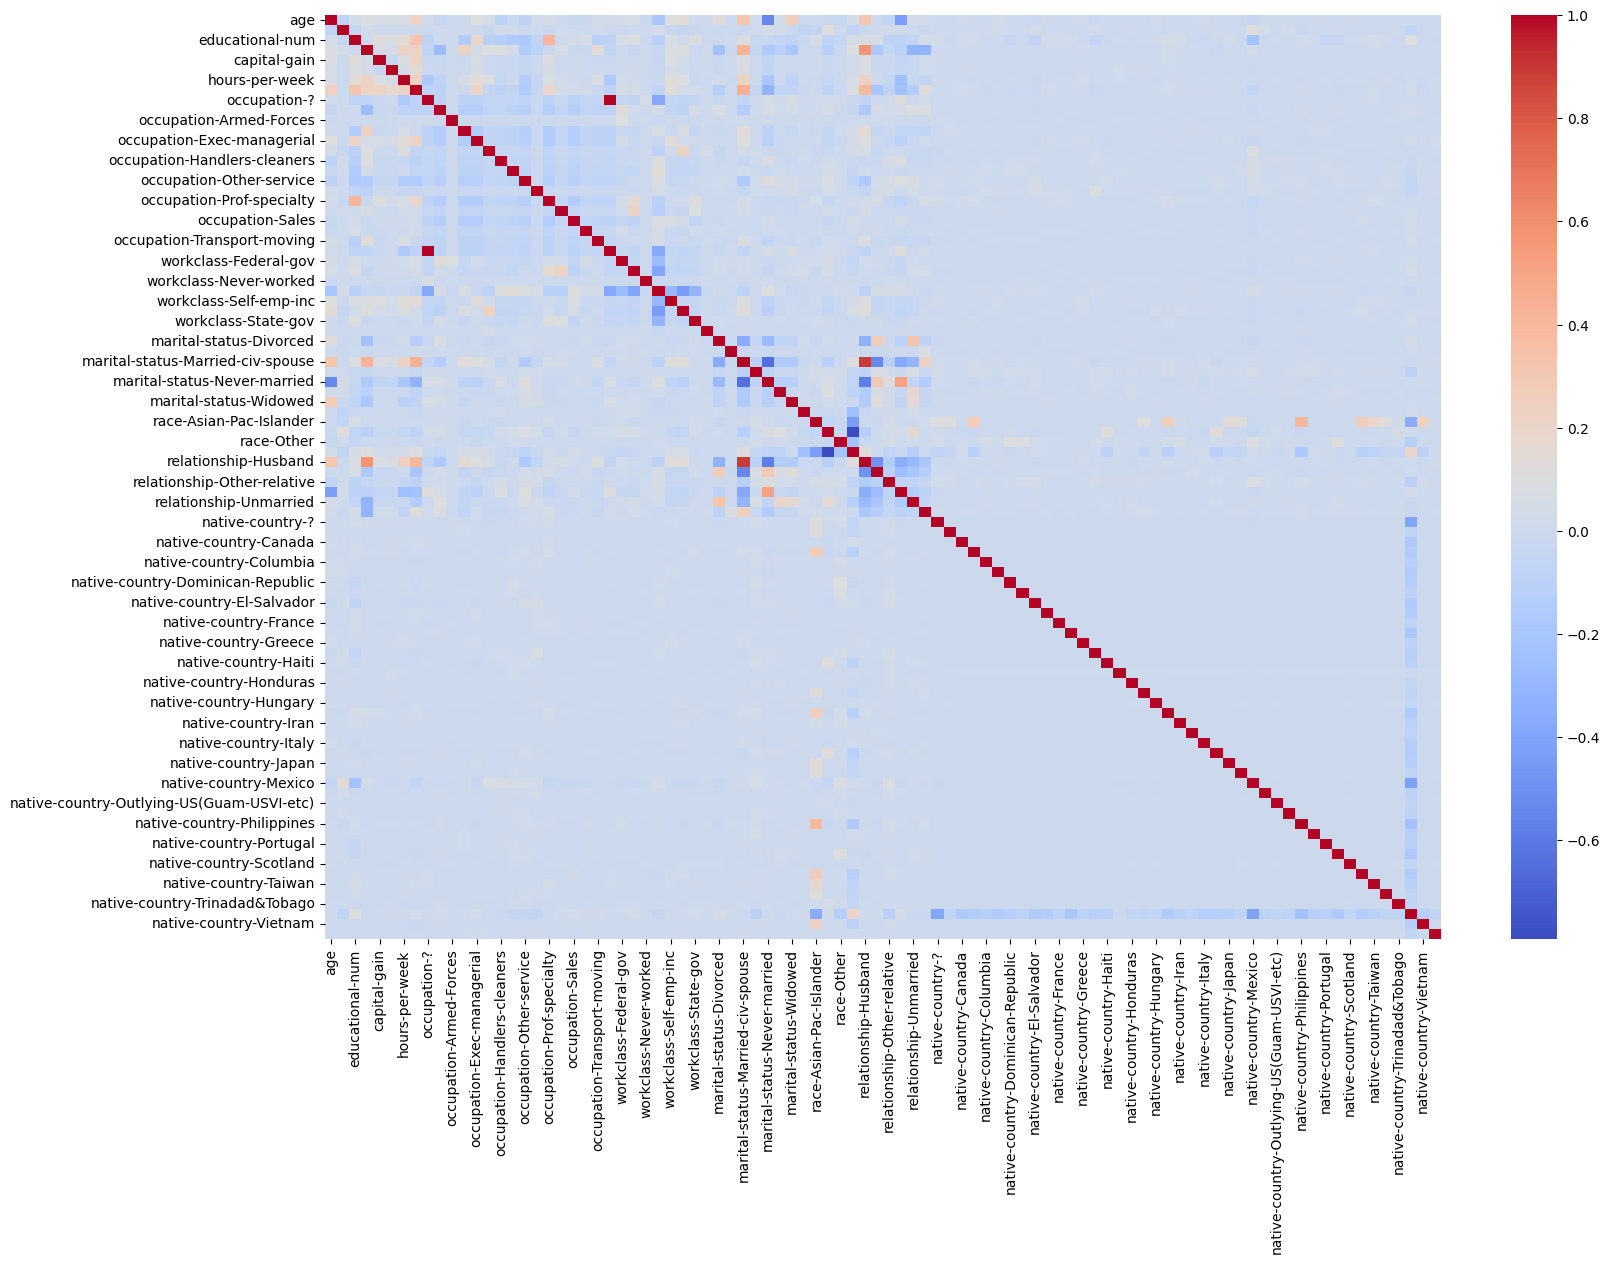

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False , cmap='coolwarm')

In [ ]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop , axis =1)

In [ ]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation-Exec-managerial,occupation-Other-service,occupation-Prof-specialty,workclass-Self-emp-inc,marital-status-Divorced,marital-status-Married-civ-spouse,marital-status-Never-married,relationship-Husband,relationship-Not-in-family,relationship-Own-child,relationship-Unmarried,relationship-Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

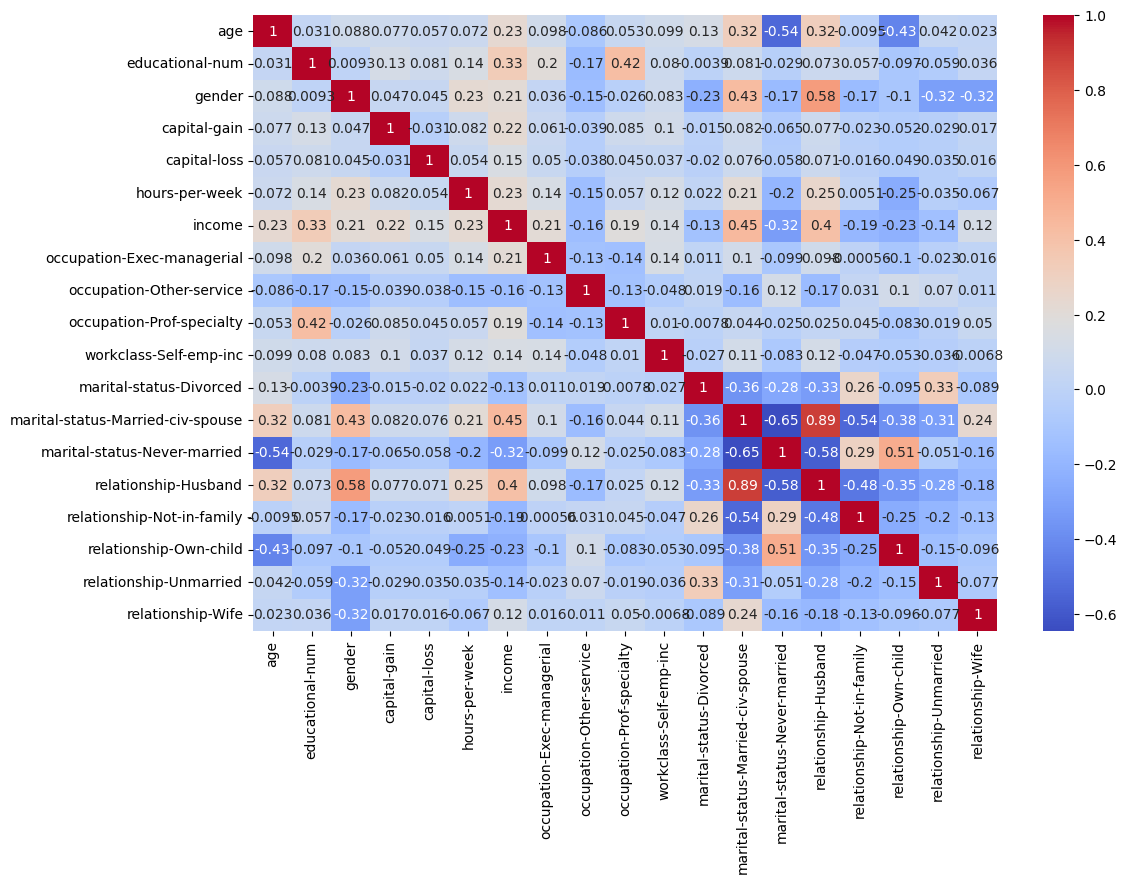

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_dropped.corr(), annot=True , cmap='coolwarm')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
train_df , test_df = train_test_split(df , test_size=0.2)

In [ ]:
train_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation-?,occupation-Adm-clerical,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
16139,41,163287,9,1,0,0,62,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44627,45,139268,9,1,0,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
33263,51,160703,8,1,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35687,20,174714,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5708,22,210474,12,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,30,196396,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24934,42,183479,11,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48245,24,175586,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7838,28,122913,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation-?,occupation-Adm-clerical,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
16303,35,76845,5,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13654,18,275848,8,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36368,27,191177,10,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
39214,57,37345,15,1,0,0,36,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5213,32,167063,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,44,83827,9,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6915,82,181912,9,1,0,0,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30978,24,237386,10,1,0,0,42,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19512,52,134447,10,1,0,0,50,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_x = train_df.drop('income' , axis = 1)
train_y = train_df['income']

test_x = train_df.drop('income' , axis = 1)
test_y = train_df['income']

In [ ]:
forest = RandomForestClassifier()
forest.fit(train_x ,train_y )

RandomForestClassifier()

In [ ]:
forest.score(test_x ,test_y )

0.9998976275177233